In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import joblib


In [14]:
dataset = 2

hr_file = f"D:/Ankit work/irs data/data{dataset}/hr.csv"
hd_file = f"D:/Ankit work/irs data/data{dataset}/hd.csv"
G_file = f"D:/Ankit work/irs data/data{dataset}/G.csv"

Theta_file = f"D:/Ankit work/irs data/data{dataset}/theta.csv"

scaler_X_file = "D:/Ankit work/irs data/notebooks/only_theta/scaler_X.pkl"
scaler_Y_file = "D:/Ankit work/irs data/notebooks/only_theta/scaler_Y.pkl"
modal_save_file = "D:/Ankit work/irs data/notebooks/only_theta/my_trained_model.keras"

In [15]:
# Load input datasets
hr = pd.read_csv(hr_file, header=None)
hd = pd.read_csv(hd_file, header=None)
G = pd.read_csv(G_file, header=None)

# Load output datasets
Theta = pd.read_csv(Theta_file, header=None)

# Concatenate input datasets (hr, hd, G) and output datasets (W, theta)
X = pd.concat([hr, hd, G], axis=1)
Y = pd.concat([Theta], axis=1)

# Standardize input data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Optionally, scale output data (depending on your needs)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)


X shape:  (876650, 154)
Y shape:  (876650, 50)


In [16]:
# Manually shuffle the dataset using pandas
X_shuffled = pd.DataFrame(X_scaled).sample(frac=1, random_state=42).reset_index(drop=True)
Y_shuffled = pd.DataFrame(Y_scaled).sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape)

(525990, 154) (525990, 50)


In [68]:
l2_lambda = 0.000001
dropout_rate = 0.001  # Set the dropout rate (0.2 = 20%)

In [74]:
# Define the neural network
model = models.Sequential()

# Input layer (shape based on input features)
model.add(layers.InputLayer(shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(128, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(100, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(70, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(64, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))

# Output layer
model.add(layers.Dense(Y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [84]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 256)                 │          39,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,022 (1.15 MB)

 Trainable params: 100,340 (391.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,682 (783.92 KB)

In [76]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Create the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

In [77]:
train_count = 1

In [78]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), batch_size=128, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.9982 - mae: 0.8944 - val_loss: 0.7926 - val_mae: 0.7617
Epoch 2/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.7054 - mae: 0.7024 - val_loss: 0.5094 - val_mae: 0.5681
Epoch 3/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.4759 - mae: 0.5443 - val_loss: 0.4004 - val_mae: 0.4914
Epoch 4/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.3896 - mae: 0.4820 - val_loss: 0.3477 - val_mae: 0.4527
Epoch 5/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.3372 - mae: 0.4439 - val_loss: 0.2974 - val_mae: 0.4152
Epoch 6/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2993 - mae: 0.4152 - val_loss: 0.2752 - val_mae: 0.3980
Epoch 7/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2767 - mae: 0.3969 - val_loss: 0.2595 - val_mae: 0.3843
Epoch 8/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2616 - mae: 0.3844 - val_loss: 0.2524 - val_mae: 0.3773
Epoch 9/100
4110/4110 ━━

In [79]:

# Evaluate the model on training, validation, and test sets
train_loss, train_mae = model.evaluate(X_train, Y_train)
val_loss, val_mae = model.evaluate(X_val, Y_val)
test_loss, test_mae = model.evaluate(X_test, Y_test)

# Get model predictions for calculating MAPE
# train_pred = model.predict(X_train)
# val_pred = model.predict(X_val)
# test_pred = model.predict(X_test)


# Create a remark about model performance (e.g., overfitting or good fit)
if train_loss < val_loss and train_loss < test_loss:
    remark = "Possible overfitting detected."
elif val_loss <= test_loss:
    remark = "Good fit."
else:
    remark = "Model underfits the data."



16438/16438 ━━━━━━━━━━━━━━━━━━━━ 16s 978us/step - loss: 0.1776 - mae: 0.3040
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 5s 991us/step - loss: 0.1824 - mae: 0.3080
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1804 - mae: 0.3066


In [80]:

# Prepare the text to log the errors and remarks
log_text = (f"Training Loss MSE: {train_loss:.4f}, Validation Loss MSE: {val_loss:.4f}, Test Loss MSE: {test_loss:.4f}\n"
            f"Training MAE: {train_mae:.4f}, Validation MAE: {val_mae:.4f}, Test MAE: {test_mae:.4f}\n"
            f"Remark: {remark}\n"
            f"He intialized , L2 Regularized (0.000001), Dropout (0.001) Early stop (Patience 20),\n" 
            # f"Learning rate scheduling (factor=0.5, patience=10, min_lr=1e-6)\n"
            f"layers: 256, 128, 100, 64\n"
            "-------------------------------------------\n")

# Append the results to a text file
with open('D:/Ankit work/irs data/notebooks/only_theta/model_performance_log.txt', 'a') as file:
    file.write(log_text)

print("Training, validation, and test errors saved to 'model_performance_log.txt'.")

Training, validation, and test errors saved to 'model_performance_log.txt'.


### Saving Modal

In [81]:
# Save the trained model to a file (HDF5 format or TensorFlow SavedModel format)
model.save(modal_save_file)  # Save as HDF5

# Save the scaler to a file
joblib.dump(scaler_X, scaler_X_file)
joblib.dump(scaler_Y, scaler_Y_file)


['D:/Ankit work/irs data/notebooks/only_theta/scaler_Y.pkl']

### Loading Modal

In [17]:
from tensorflow.keras.models import load_model
from tensorflow import keras

# Load the model
loaded_model = keras.models.load_model(modal_save_file)

# Load the saved scaler
scaler_X_loaded = joblib.load(scaler_X_file)
scaler_Y_loaded = joblib.load(scaler_Y_file)


In [100]:
loaded_model = model
scaler_X_loaded = scaler_X
scaler_Y_loaded = scaler_Y

In [18]:
loaded_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 256)                 │          39,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,022 (1.15 MB)

 Trainable params: 100,340 (391.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,682 (783.92 KB)

### PREDICTION

In [19]:
hr_testing_file = f"D:/Ankit work/irs data/testing_data/hr.csv"
hd_testing_file = f"D:/Ankit work/irs data/testing_data/hd.csv"
G_testing_file = f"D:/Ankit work/irs data/testing_data/G.csv"

# Load input datasets
hr_testing = pd.read_csv(hr_testing_file, header=None)
hd_testing = pd.read_csv(hd_testing_file, header=None)
G_testing = pd.read_csv(G_testing_file, header=None)

# Concatenate input datasets (hr, hd, G) and output datasets (W, theta)
X_testing = pd.concat([hr_testing, hd_testing, G_testing], axis=1)

X_scaled_testing = scaler_X_loaded.transform(X_testing)
print(X_testing.shape)


(100, 154)


In [20]:
# Let's assume 'new_data_batch' is a batch of new inputs (e.g., multiple samples).
new_data_batch = X_scaled_testing

# Make predictions for the batch
scaled_predictions = loaded_model.predict(new_data_batch)
print(scaled_predictions.shape)
predictions = scaler_Y_loaded.inverse_transform(scaled_predictions)

# Print the predictions
print("Predictions for the batch of inputs:", predictions.shape)

# Evaluate the model on test data
test_loss, test_mae = loaded_model.evaluate(X_test, Y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(100, 50)
Predictions for the batch of inputs: (100, 50)
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 5s 913us/step - loss: 0.1804 - mae: 0.3066
Test Loss: 0.18071211874485016
Test MAE: 0.30663061141967773


In [21]:
import pandas as pd

# Assuming Y_pred is a NumPy array
# If it's not, convert it to a NumPy array: Y_pred = np.array(Y_pred)

# Convert to DataFrame
Y_pred_df = pd.DataFrame(predictions)  # Add appropriate column name(s)

# Save to CSV
Y_pred_df.to_csv('D:/Ankit work/irs data/notebooks/only_theta/testing_data/only_theta_pred.csv', index=False, header=False)  # index=False to avoid adding row numbers to the file


(20, 50) (20, 50)


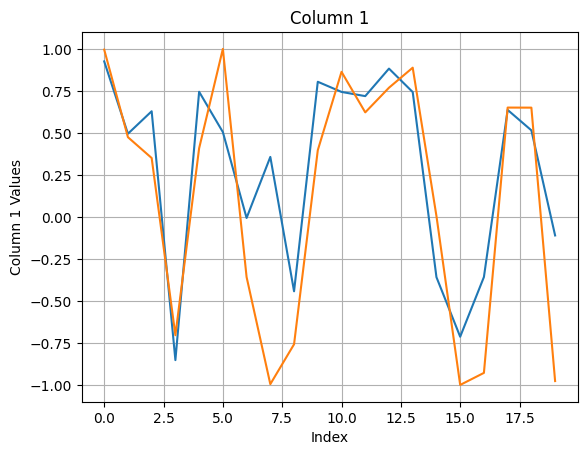

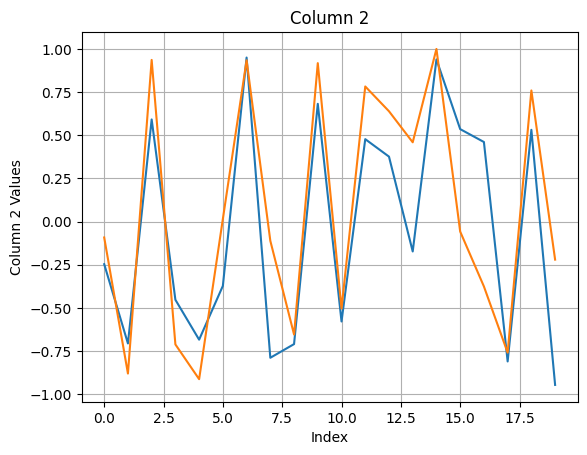

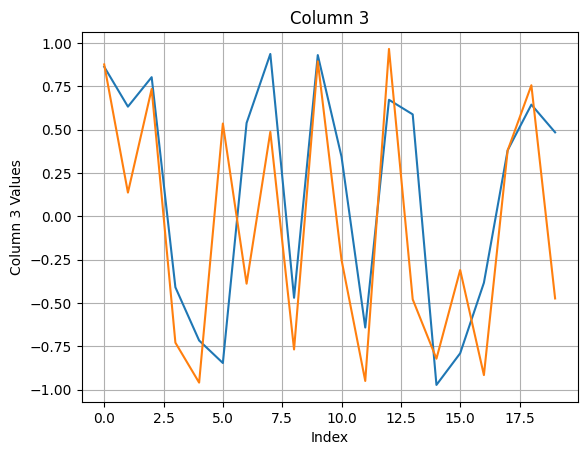

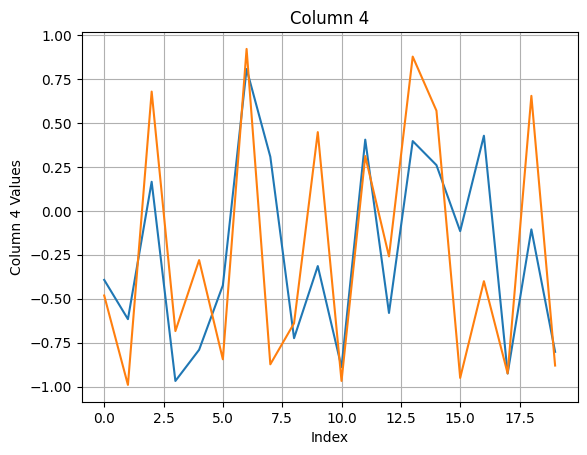

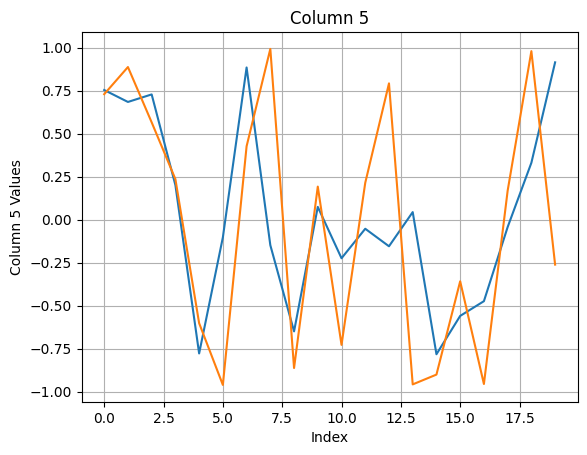

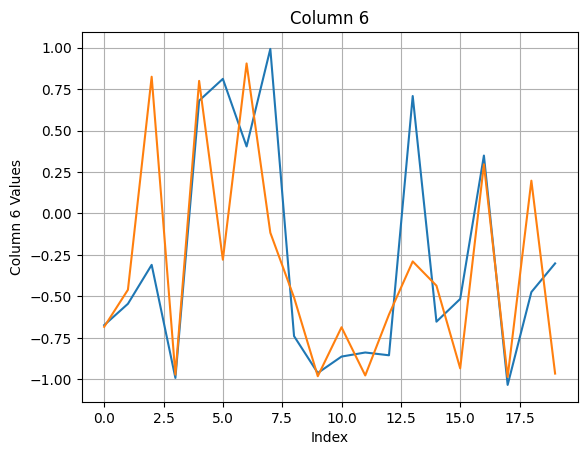

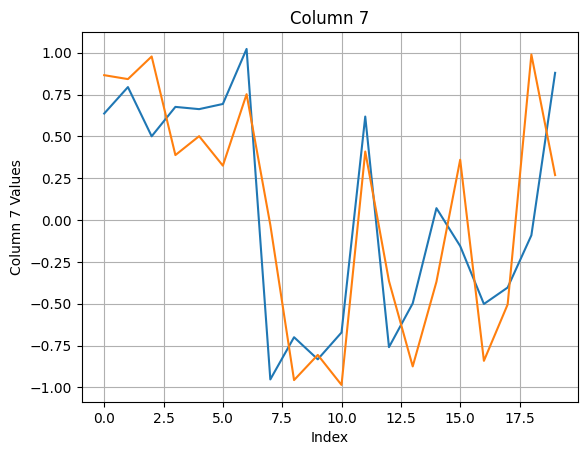

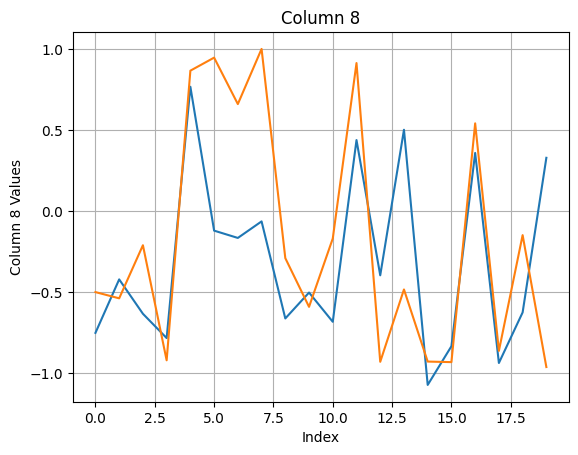

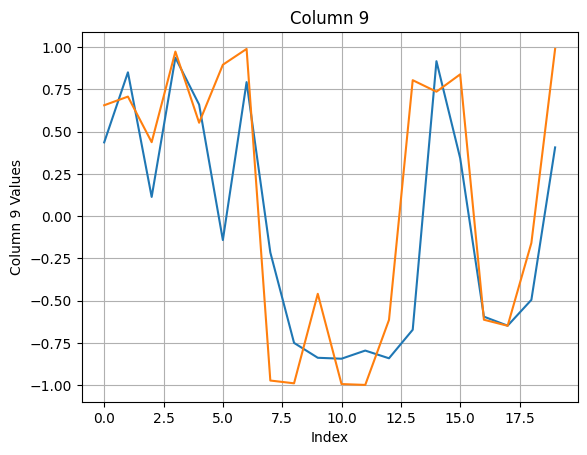

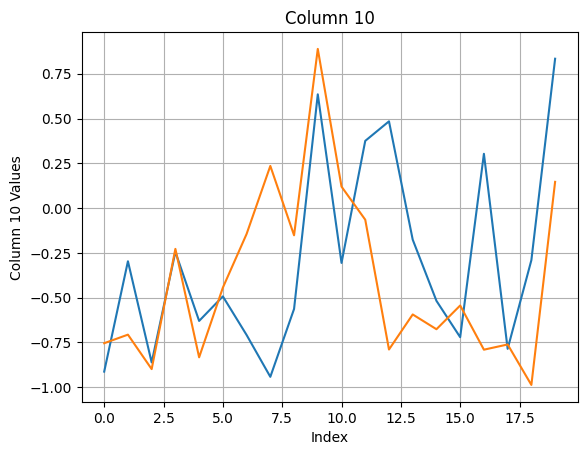

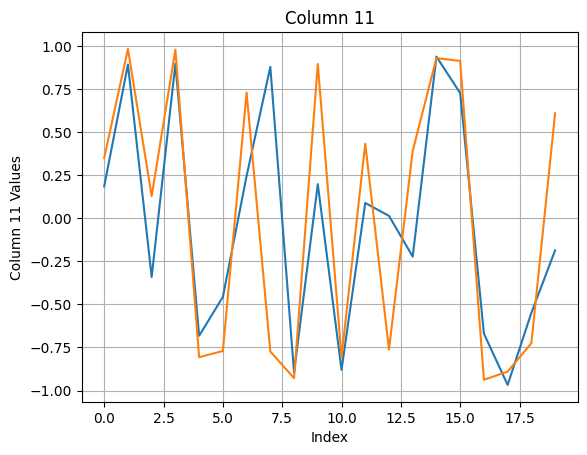

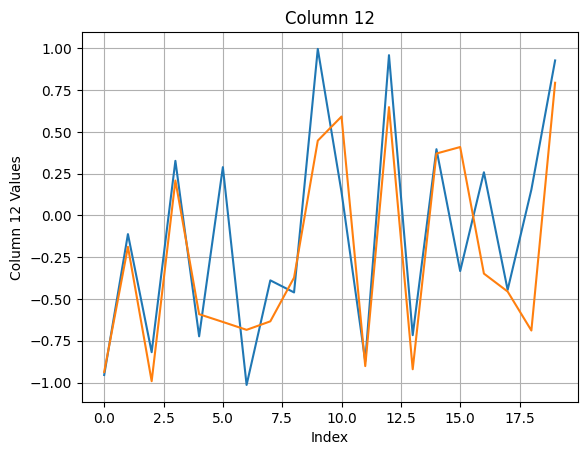

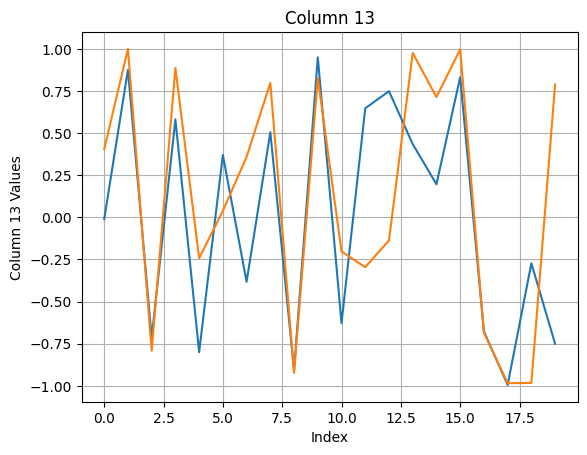

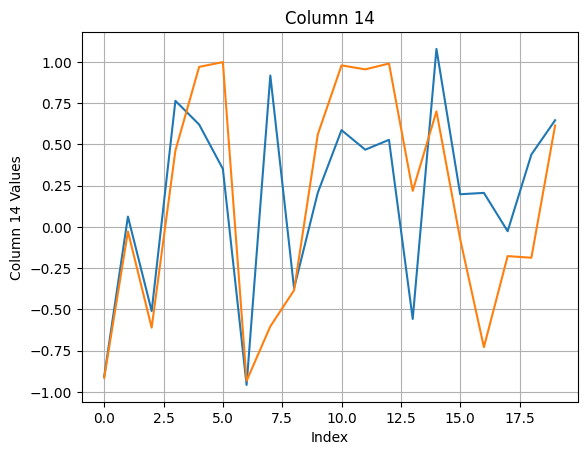

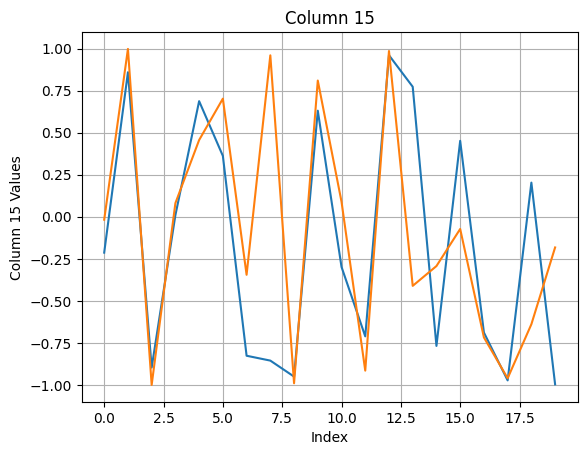

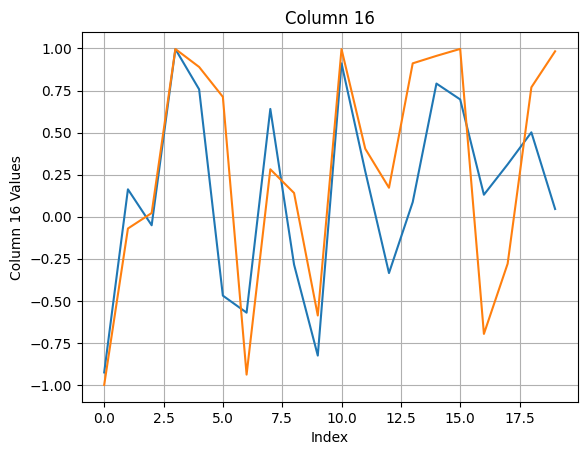

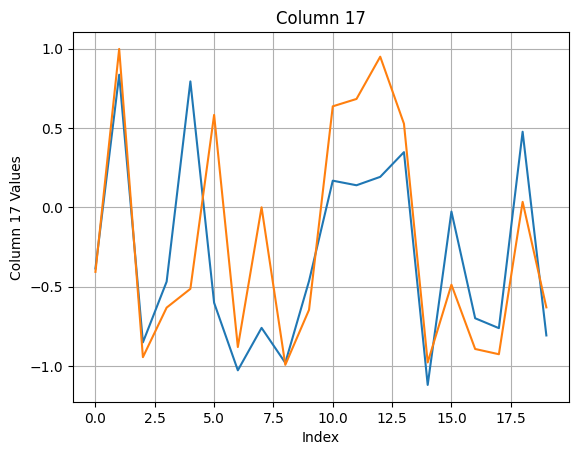

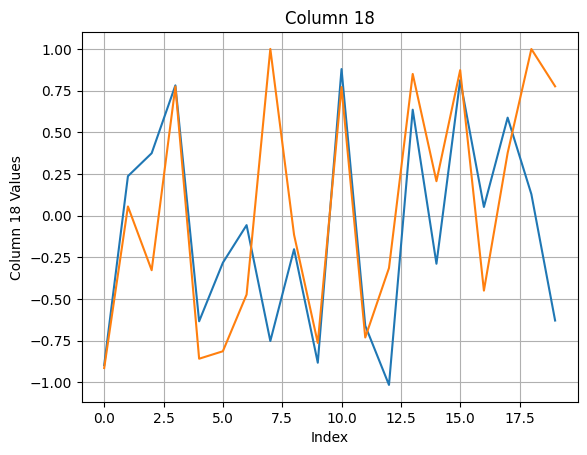

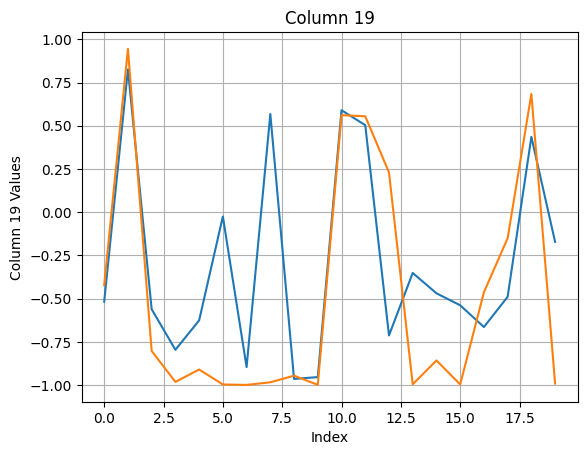

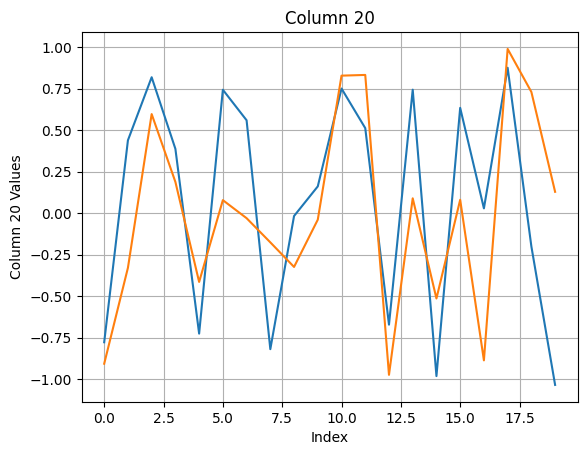

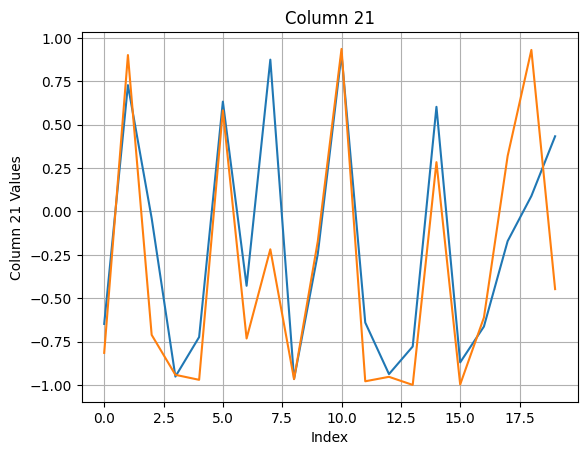

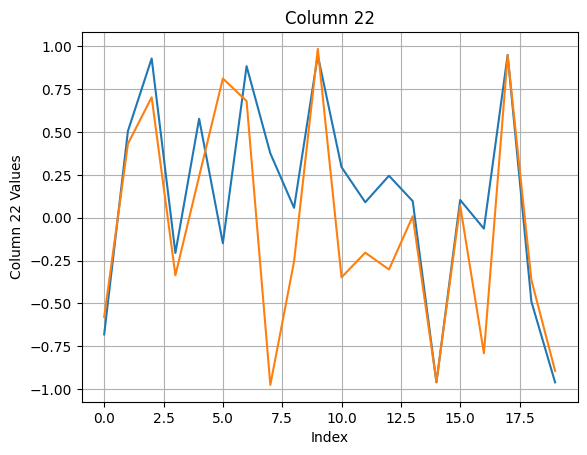

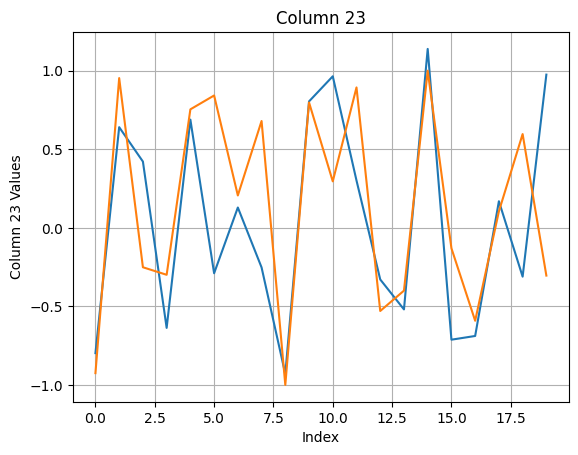

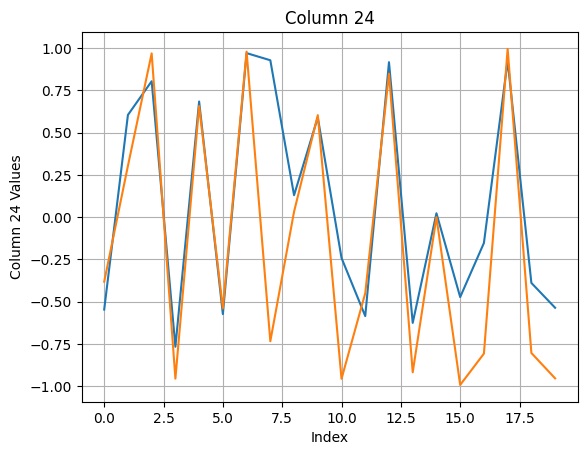

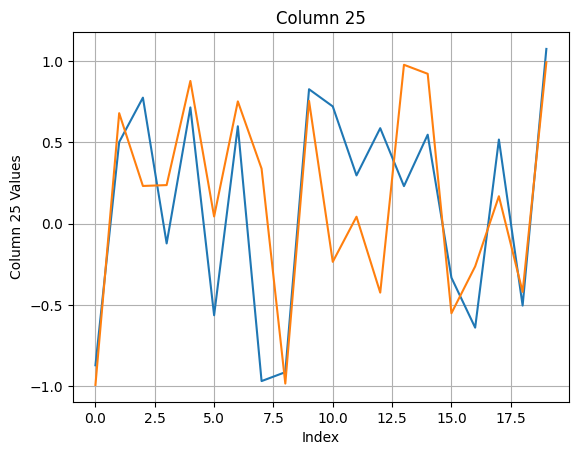

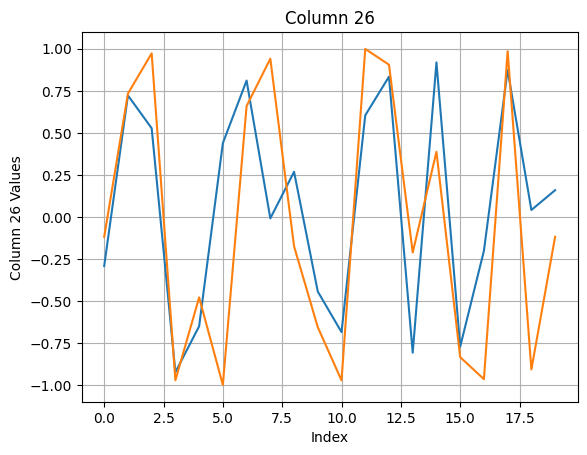

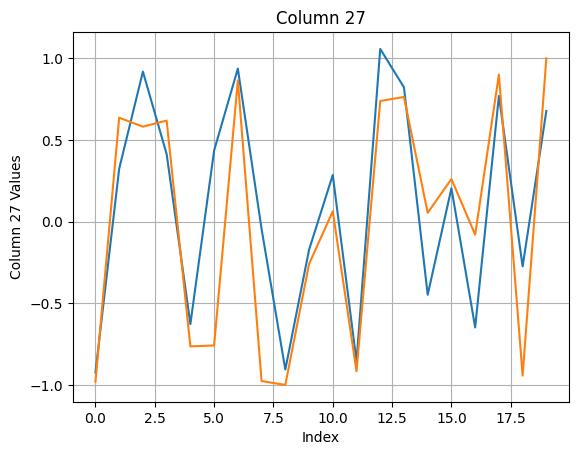

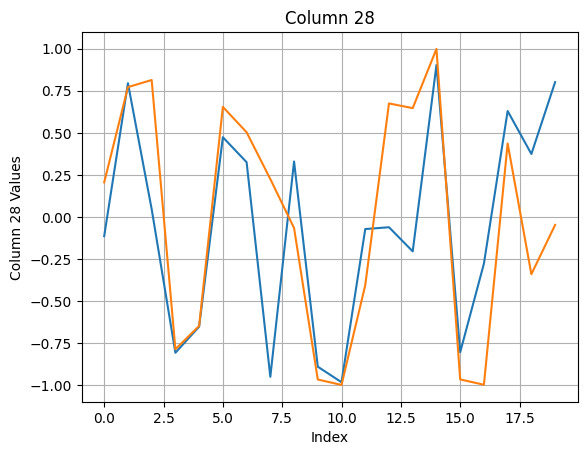

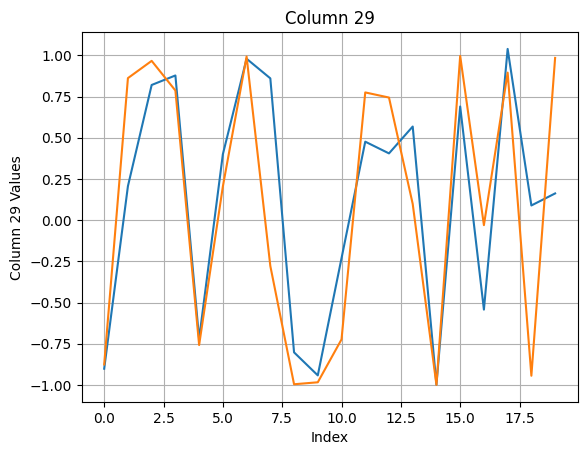

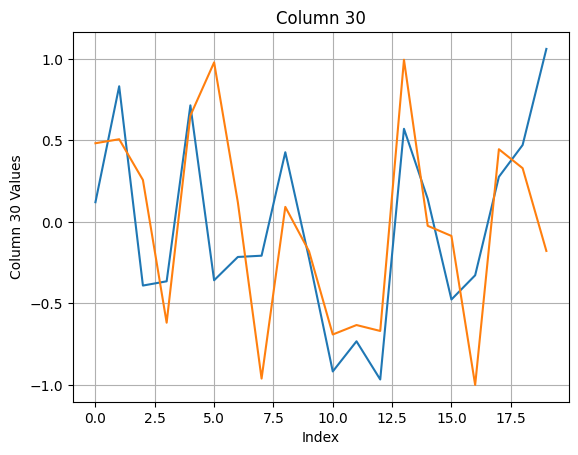

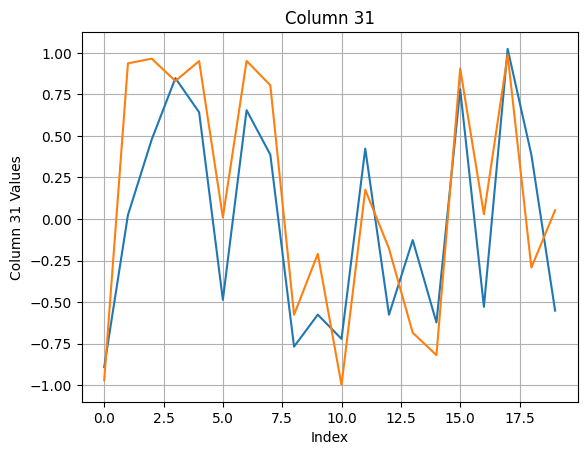

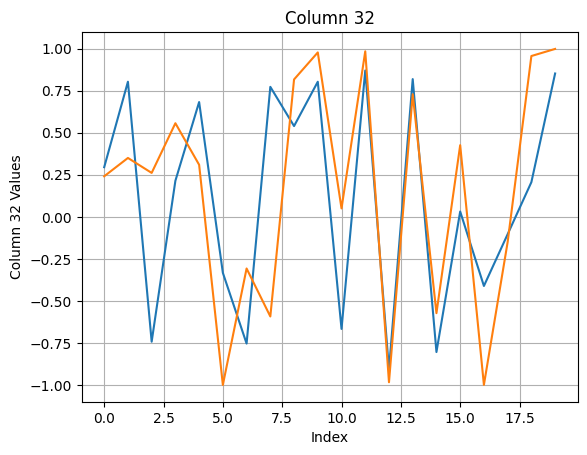

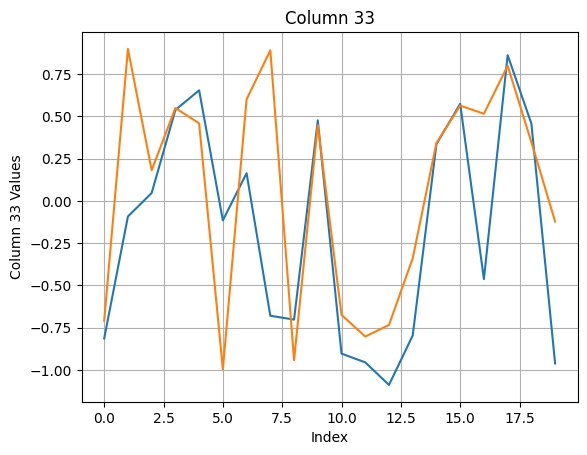

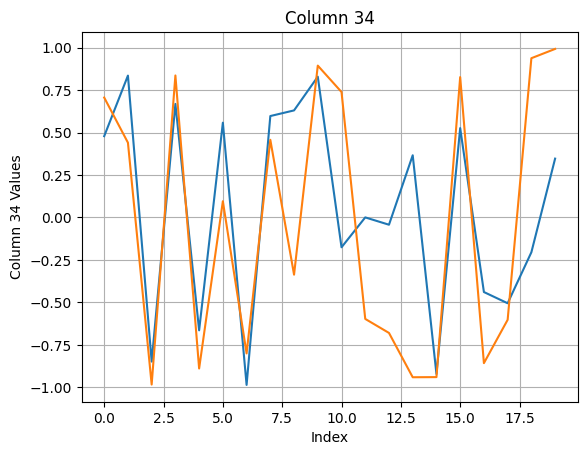

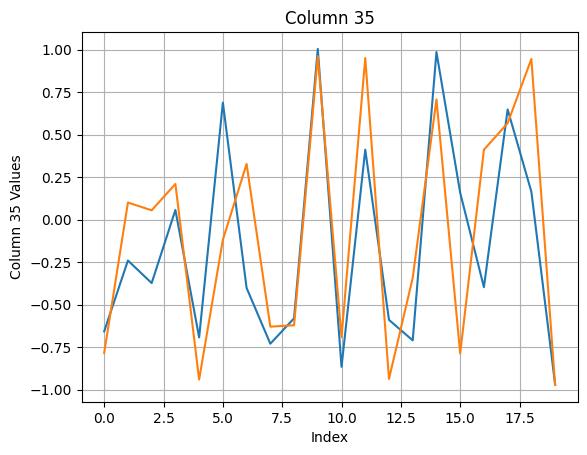

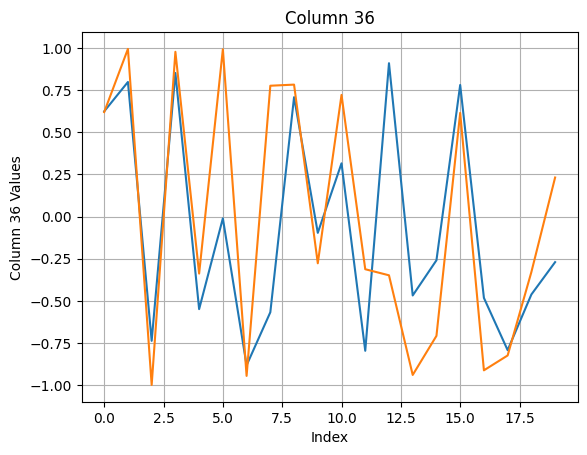

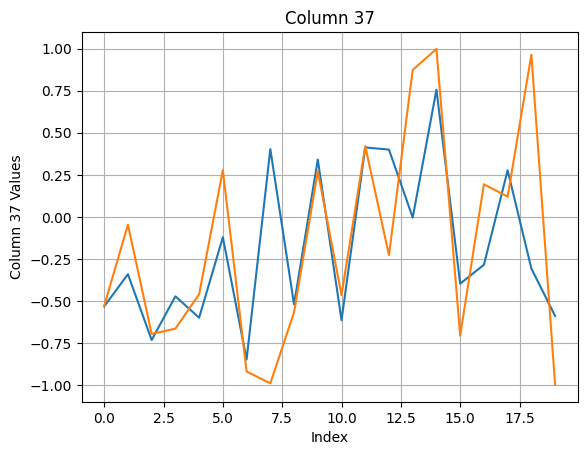

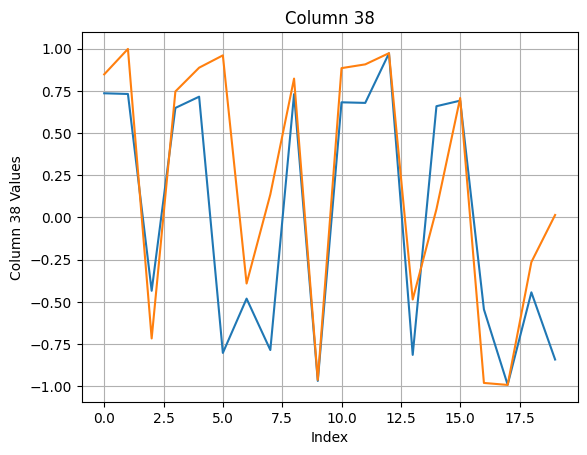

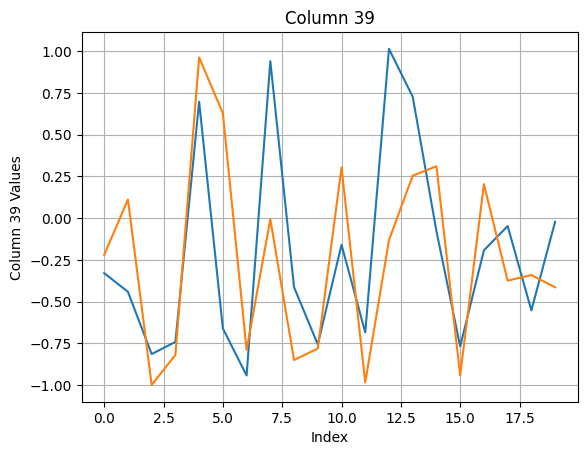

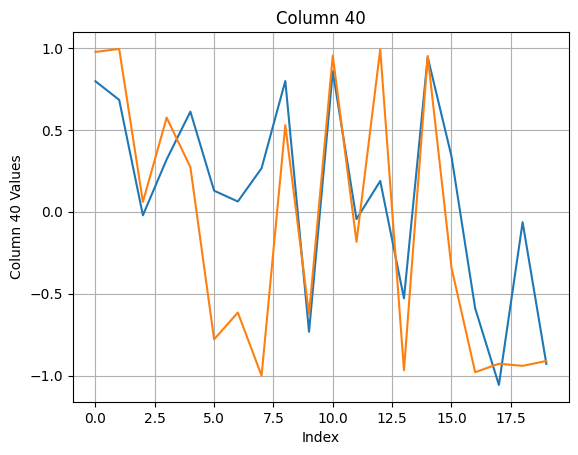

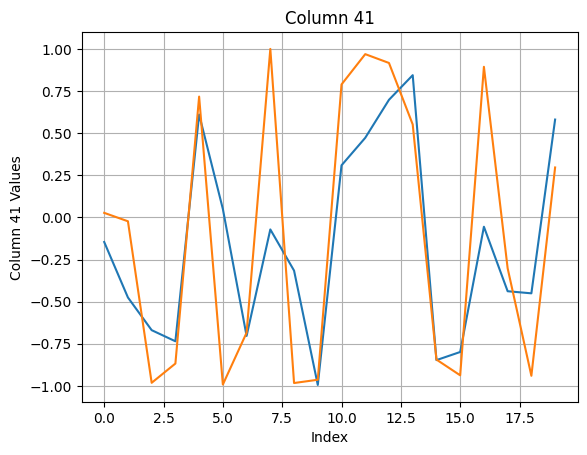

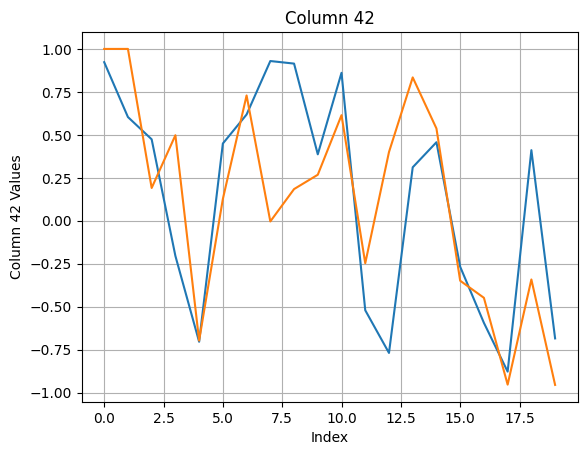

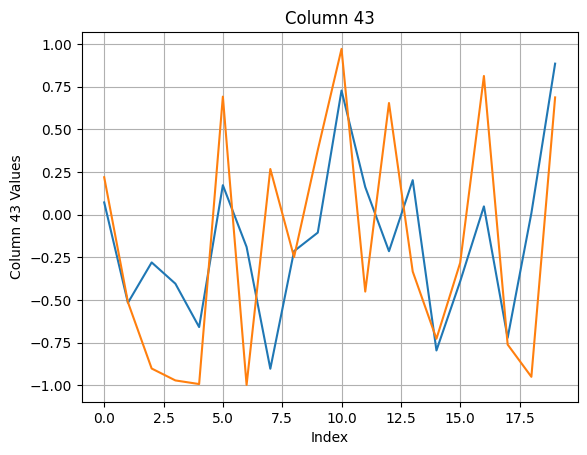

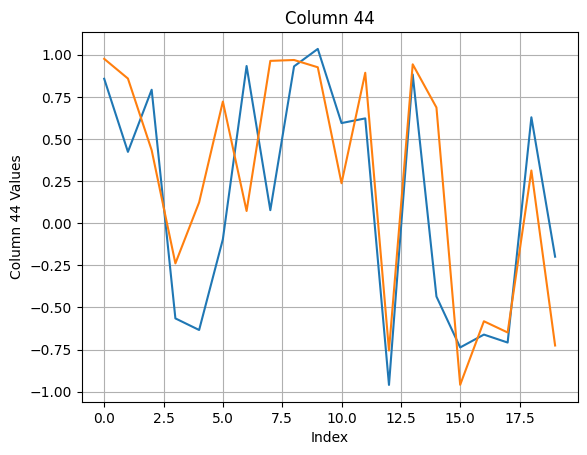

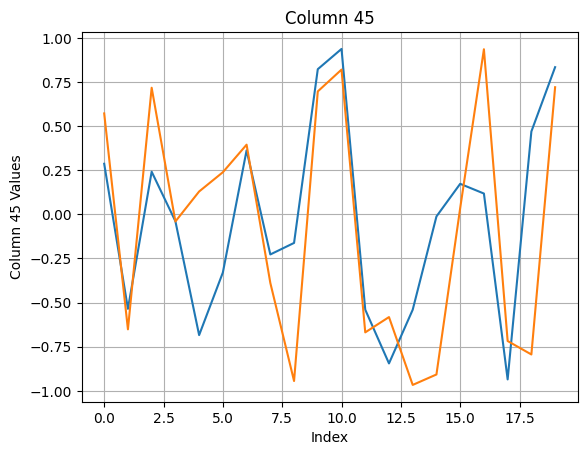

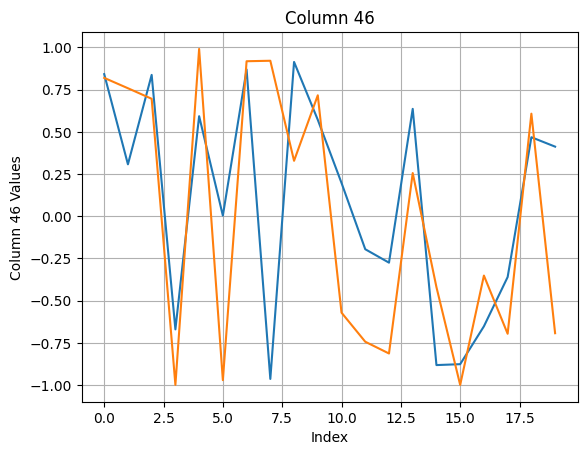

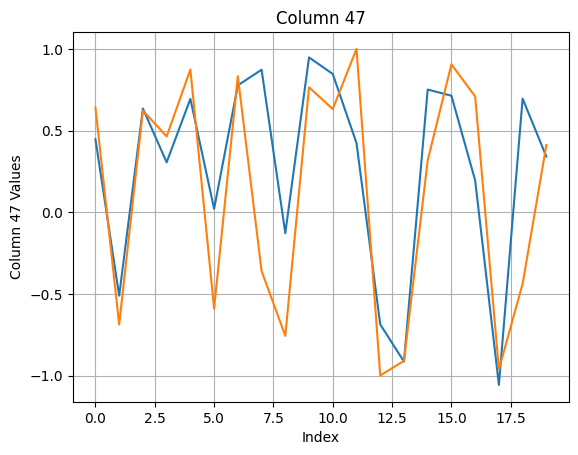

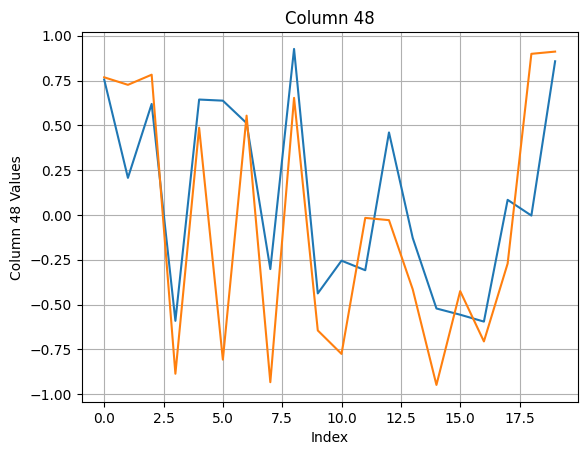

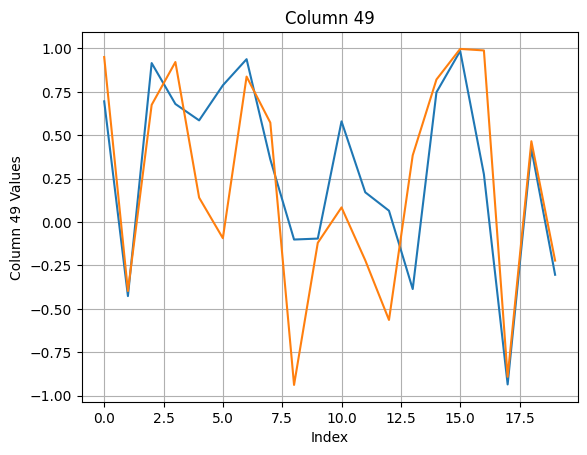

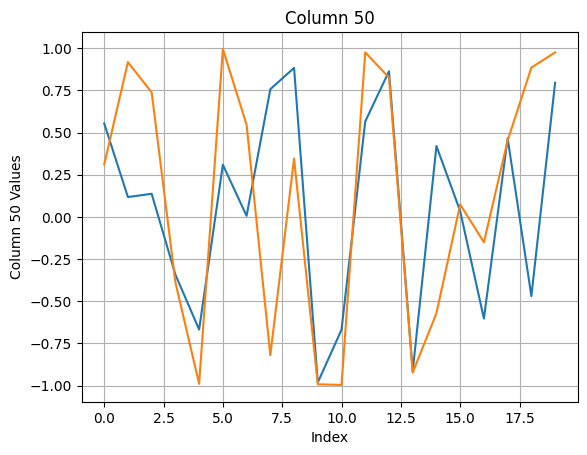

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file without a header
df = pd.read_csv('D:/Ankit work/irs data/notebooks/only_theta/testing_data/predictions.csv', header=None)
df2 = pd.read_csv('D:/Ankit work/irs data/testing_data/theta.csv', header=None)

print(df.shape, df2.shape)
# Plot each column separately
for i in range(df.shape[1]):  # df.shape[1] gives the number of columns
    plt.figure()  # Create a new figure for each plot
    plt.plot(df[i])  # Plot the i-th column
    plt.plot(df2[i])  # Plot the i-th column
    plt.title(f'Column {i+1}')  # Add title for clarity
    plt.xlabel('Index')  # X-axis label
    plt.ylabel(f'Column {i+1} Values')  # Y-axis label
    plt.grid(True)  # Enable grid
    plt.show()  # Show the plot
